AIM #1: Loading the dataset and printing basic information 
1. Import the Titanic dataset using pandas
2. Create a Dataframe from the dataset
3. Print the first 10 rows of the dataset
4. Print the last 20 rows of the dataset
5. Print dataset's information
6. Describe the dataset
7. Make sure all the information returned by the different functions are displayed in a single table and not on multiple ines

In [2]:
import pandas as pd

file_path = 'titanic.csv' 
df = pd.read_csv(file_path)

first_10_rows = df.head(10)


last_20_rows = df.tail(20)


data_info = df.info()


data_description = df.describe(include='all')


print("\nThe first 10 rows of the dataset:")
print(first_10_rows)

print("\nThe last 20 rows of the dataset:")
print(last_20_rows)

print("\nDataset Information:")
print(data_info)

print("\nDataset Description:")
print(data_description)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 83.7+ KB

The first 10 rows of the dataset:
   PassengerId Survived  Pclass  \
0            1        0       3   
1            2        1       1   
2            3        1       3   
3            4        1       1   
4            5        0       3   

AIM #2: Finding issues (empty, NAs, incorrect value, incorrect format, outliers, etc.) 
1. Find out how many missing values there are in the dataset
2. For the 'Age' column, find the best way to handle the missing values
    2.1. Use an appropriate plot to study the nature of the 'Age' column
    2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
    2.3. Using the most suitable central tendency measure, fill the missing values in the age column
3. Decide what is the best way to handle the missing values in the 'Cabin' columns
4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
5. Handle the incorrect data under the 'Survived' columns using appropriate measure
6. Handle the incorrectly formatted data under the 'Fare' column


Missing values in the dataset:
Age         177
Cabin       687
Embarked      2
dtype: int64


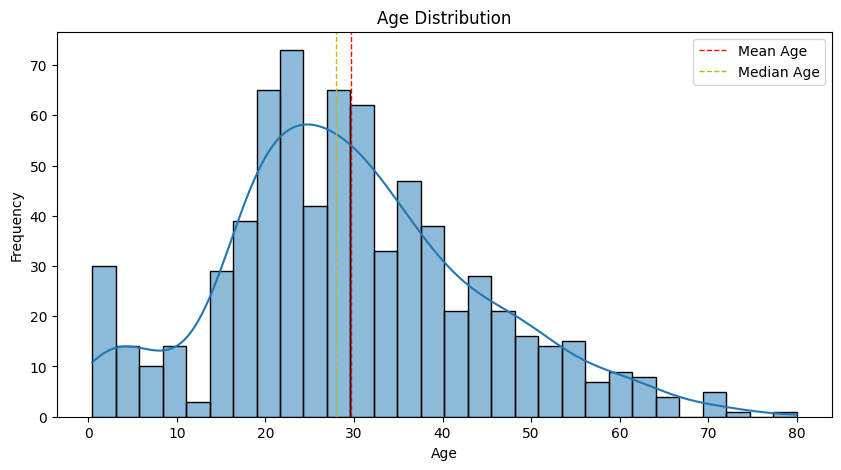

Mean Age: 29.69911764705882, Median Age: 28.0

Processed dataset:
   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   
5            6       0.0       3   
6            7       0.0       1   
7            8       0.0       3   
8            9       1.0       3   
9           10       1.0       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male  28.0      0  

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = 'titanic.csv'
df = pd.read_csv(file_path)


missing_values = df.isnull().sum()
print("Missing values in the dataset:")
print(missing_values[missing_values > 0])


plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axvline(df['Age'].mean(), color='r', linestyle='dashed', linewidth=1, label='Mean Age')
plt.axvline(df['Age'].median(), color='y', linestyle='dashed', linewidth=1, label='Median Age')
plt.legend()
plt.show()


mean_age = df['Age'].mean()
median_age = df['Age'].median()
print(f"Mean Age: {mean_age}, Median Age: {median_age}")

df['Age'] = df['Age'].fillna(median_age)
df['Cabin'] = df['Cabin'].fillna('Unknown')
most_frequent_port = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(most_frequent_port)
df['Survived'] = pd.to_numeric(df['Survived'], errors='coerce')
df['Survived'] = df['Survived'].fillna(0)
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())


print("\nProcessed dataset:")
print(df.head(10))


AIM #3: Grouping 
1. Find out the average fare grouped by Pclass
    1.1. Plot the above using a suitable plot
2. Find out the average fare grouped by Sex
    2.1. Plot the above using a suitable plot

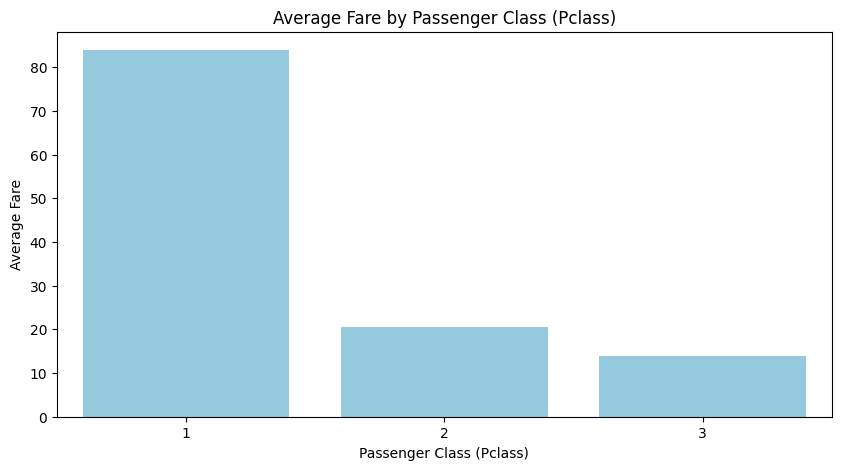

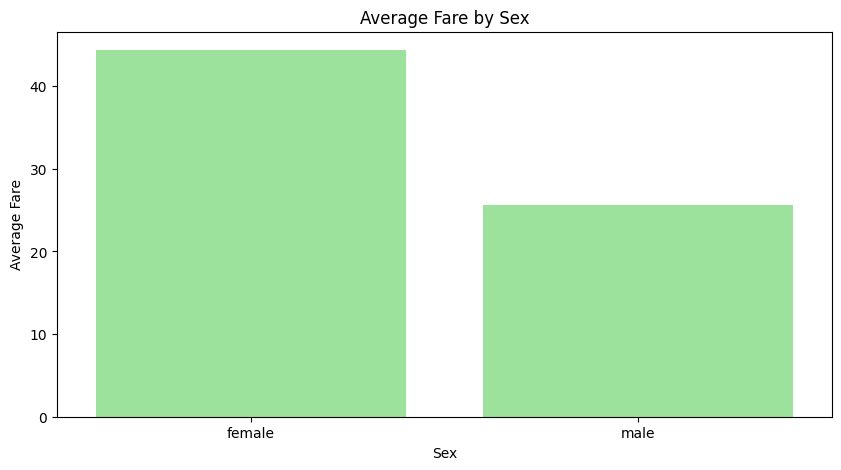

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'titanic.csv'
df = pd.read_csv(file_path)

df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')
df['Fare'] = df['Fare'].fillna(df['Fare'].mean()) 

average_fare_by_pclass = df.groupby('Pclass')['Fare'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='Pclass', y='Fare', data=average_fare_by_pclass, color='skyblue')
plt.title('Average Fare by Passenger Class (Pclass)')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.show()

average_fare_by_sex = df.groupby('Sex')['Fare'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='Sex', y='Fare', data=average_fare_by_sex, color='lightgreen')
plt.title('Average Fare by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.show()


AIM #4: Dataset visualization using pandas

1. Plot the distribution of 'Age' using a suitable plot
2. Plot the distribution of 'Fare' using a suitable plot
3. Plot the distribution of 'Pclass' using a suitable plot
4. Plot the distribution of 'Survived' using a suitable plot
5. Plot the distribution of 'Embarked' using a suitable plot
6. Plot the distribution of 'Fare' grouped by 'Survived'
7. Plot the distribution of 'Fare' grouped by 'Pclass'
8. Plot the distribution of 'Age' grouped by 'Survived'
9. Plot the distribution of 'Age' grouped by 'PClass'
10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
13. Are there any other possibilities to show relationships?

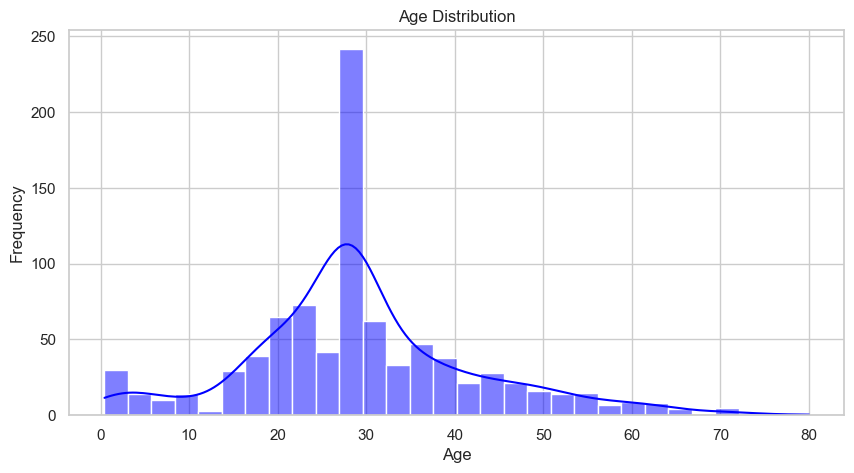

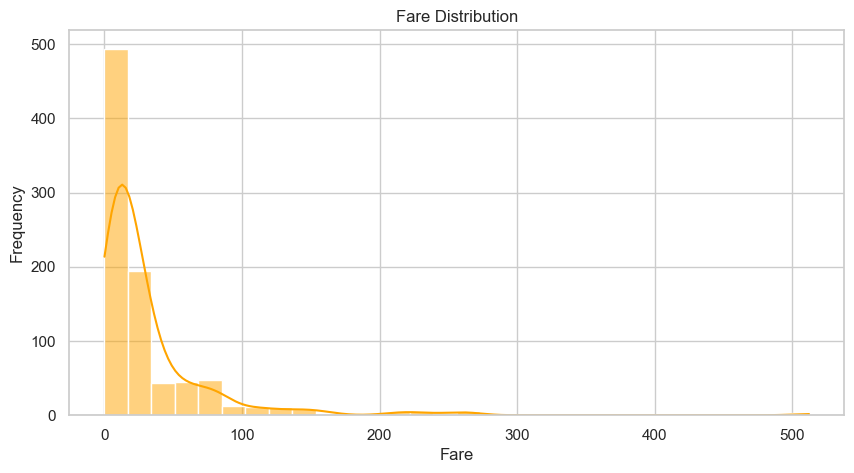

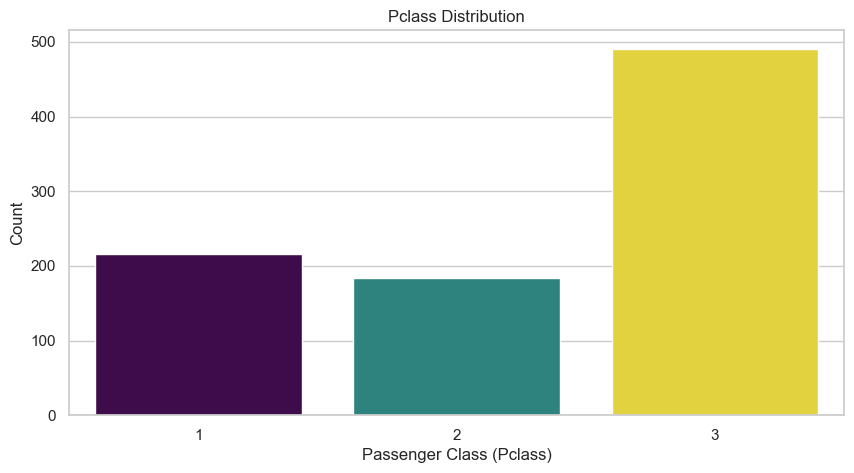

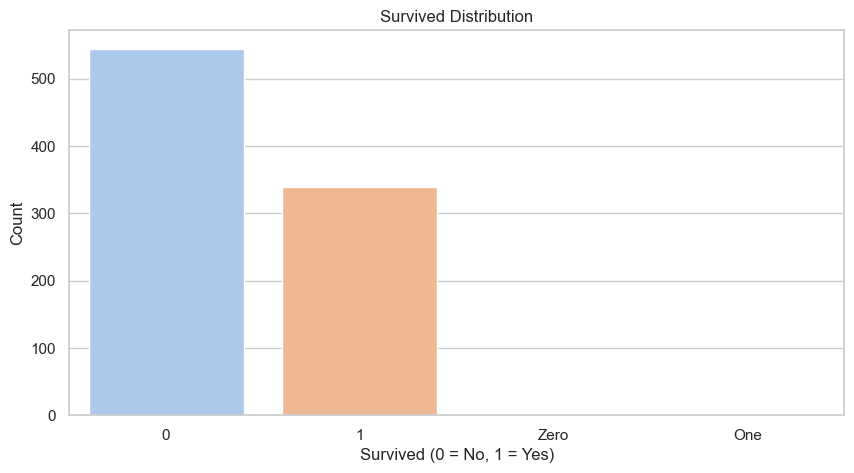

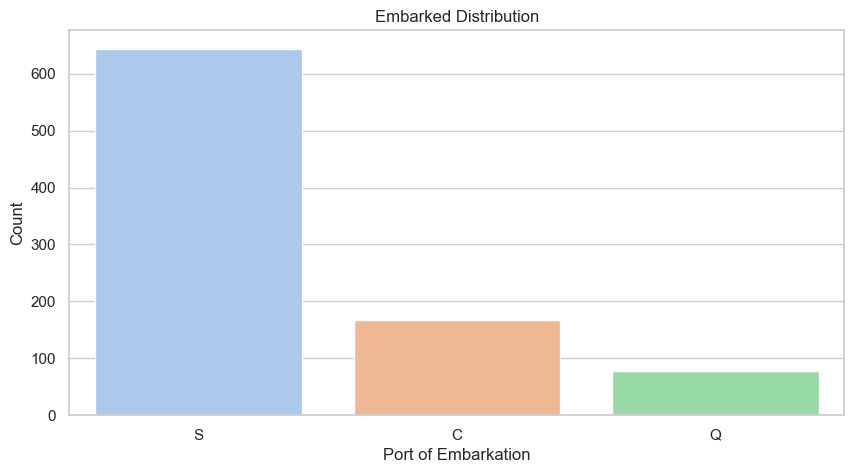

C:\Users\姜洲\AppData\Local\Temp\ipykernel_7116\4216872897.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Fare', data=df, palette='Set2')


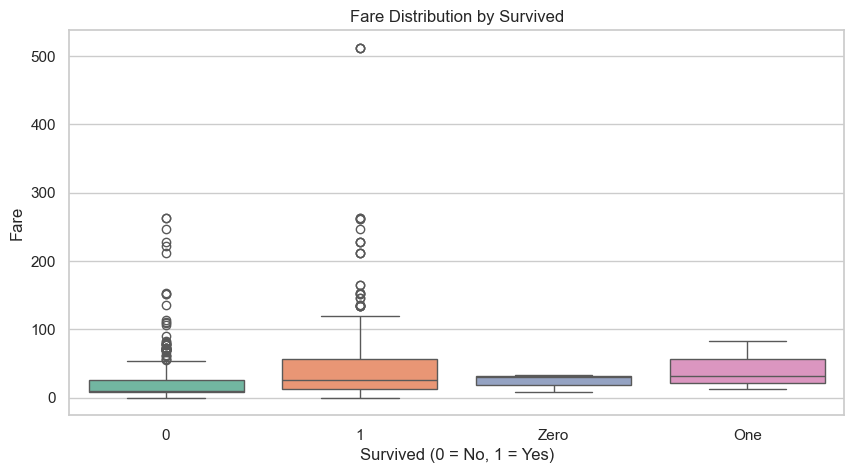

C:\Users\姜洲\AppData\Local\Temp\ipykernel_7116\4216872897.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Fare', data=df, palette='Set1')


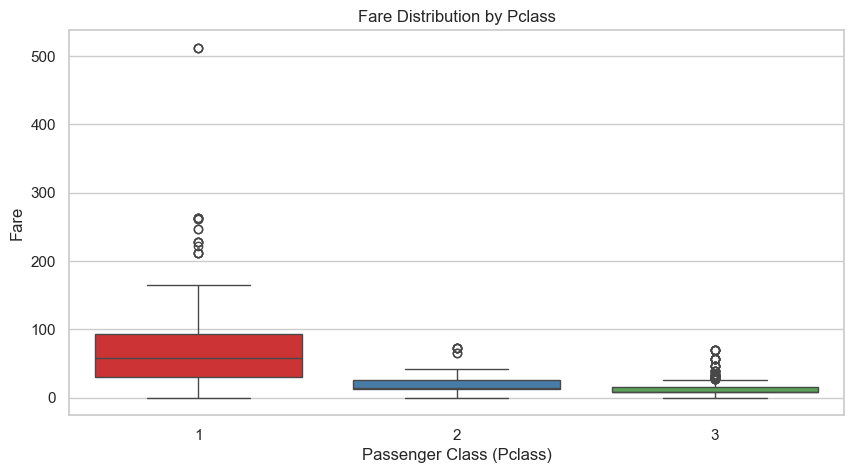

C:\Users\姜洲\AppData\Local\Temp\ipykernel_7116\4216872897.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=df, palette='Set3')


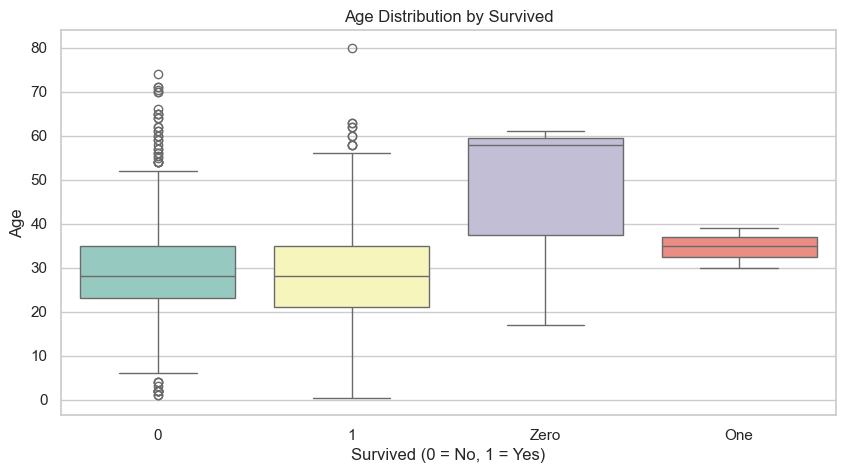

C:\Users\姜洲\AppData\Local\Temp\ipykernel_7116\4216872897.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=df, palette='Set2')


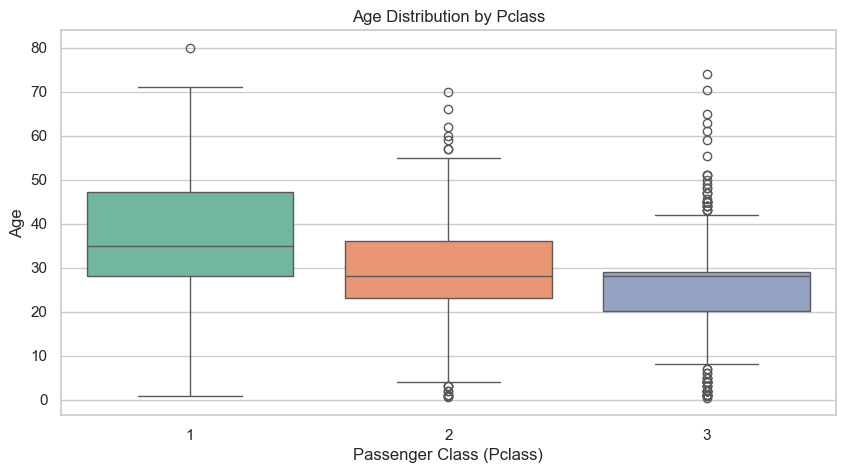

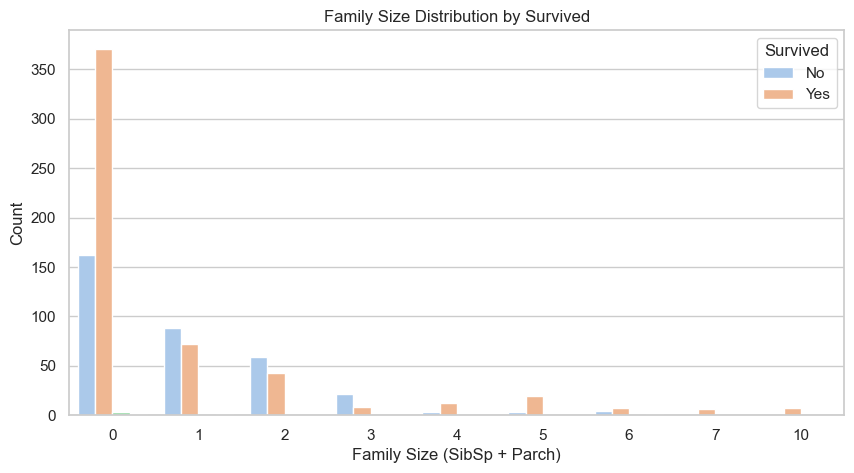

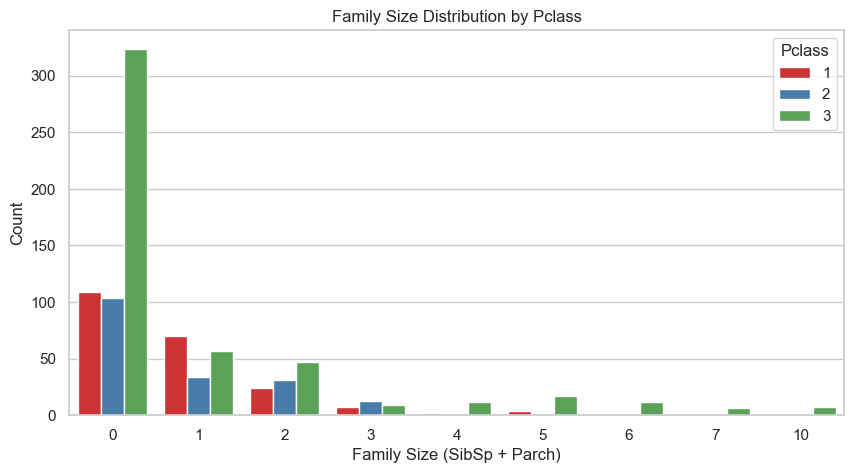

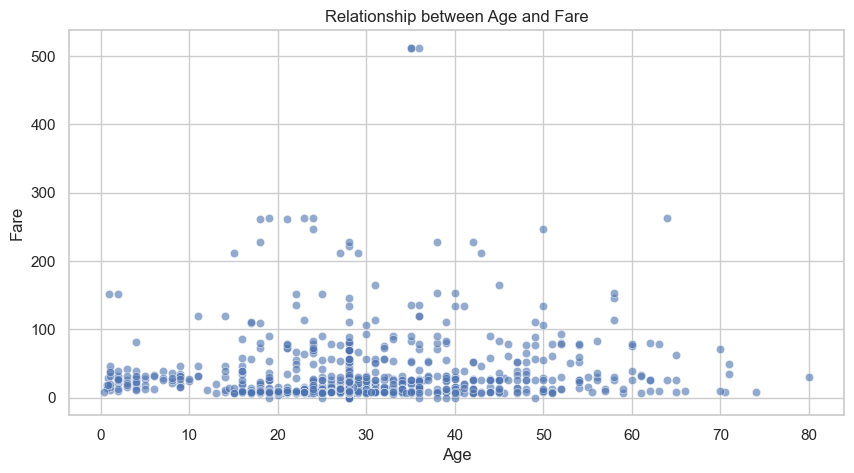

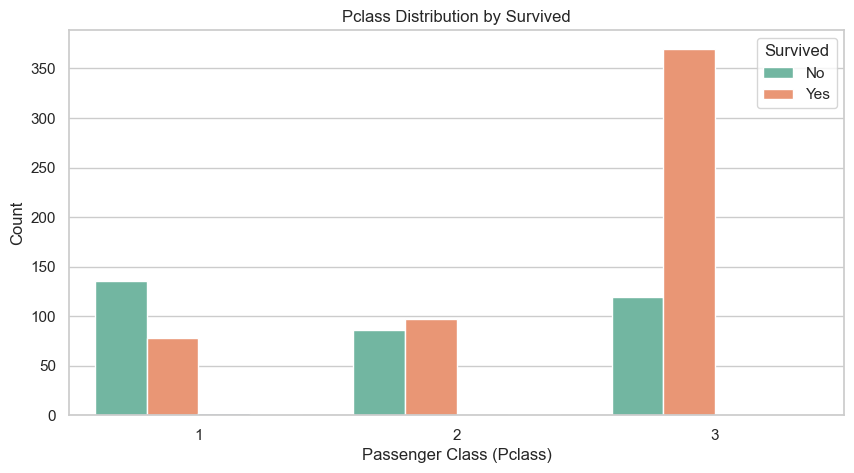

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'titanic.csv'
df = pd.read_csv(file_path)

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')

df['Age'] = df['Age'].fillna(df['Age'].median())

df['Fare'] = df['Fare'].fillna(df['Fare'].mean())


sns.set(style="whitegrid")


plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 5))
sns.histplot(df['Fare'], bins=30, kde=True, color='orange')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(hue='Pclass', data=df, palette='viridis', x='Pclass', legend=False)
plt.title('Pclass Distribution')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10, 5))
sns.countplot(hue='Survived', data=df, palette='pastel', x='Survived', legend=False)
plt.title('Survived Distribution')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10, 5))
sns.countplot(hue='Embarked', data=df, palette='pastel', x='Embarked', legend=False)
plt.title('Embarked Distribution')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10, 5))
sns.boxplot(x='Survived', y='Fare', data=df, palette='Set2')
plt.title('Fare Distribution by Survived')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()


plt.figure(figsize=(10, 5))
sns.boxplot(x='Pclass', y='Fare', data=df, palette='Set1')
plt.title('Fare Distribution by Pclass')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Fare')
plt.show()


plt.figure(figsize=(10, 5))
sns.boxplot(x='Survived', y='Age', data=df, palette='Set3')
plt.title('Age Distribution by Survived')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()


plt.figure(figsize=(10, 5))
sns.boxplot(x='Pclass', y='Age', data=df, palette='Set2')
plt.title('Age Distribution by Pclass')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Age')
plt.show()


df['FamilySize'] = df['SibSp'] + df['Parch']
plt.figure(figsize=(10, 5))
sns.countplot(x='FamilySize', hue='Survived', data=df, palette='pastel')
plt.title('Family Size Distribution by Survived')
plt.xlabel('Family Size (SibSp + Parch)')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='FamilySize', hue='Pclass', data=df, palette='Set1')
plt.title('Family Size Distribution by Pclass')
plt.xlabel('Family Size (SibSp + Parch)')
plt.ylabel('Count')
plt.legend(title='Pclass', loc='upper right')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x='Age', y='Fare', data=df, alpha=0.6)
plt.title('Relationship between Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set2')
plt.title('Pclass Distribution by Survived')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()


AIM #5: Correlation

1. Generate a correlation matrix for the entire dataset
2. Find correlation between 'Age' and 'Fare'
3. What other possible correlations can be found in the dataset?

In [5]:
import pandas as pd

file_path = 'titanic.csv'
df = pd.read_csv(file_path)

print("Unique values in 'Fare':", df['Fare'].unique())
print("Unique values in 'Age':", df['Age'].unique())
print("Unique values in other columns:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")

df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

object_cols = df.select_dtypes(include=['object']).columns
for col in object_cols:
    print(f"Processing column: {col}")
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

correlation_matrix = df.corr()

print("Correlation Matrix:")
print(correlation_matrix)

age_fare_correlation = df['Age'].corr(df['Fare'])
print(f"\nCorrelation between Age and Fare: {age_fare_correlation}")

other_correlations = correlation_matrix['Survived'].sort_values(ascending=False)
print("\nOther Possible Correlations with 'Survived':")
print(other_correlations)


Unique values in 'Fare': ['7.25' '71.2833' '7.925' '53.1' '8.05' '8.4583' '51.8625' '21.075'
 '11.1333' '30.0708' '16.7' '26.55' '31.275' '7.8542' '16' '29.125' '13'
 '18' '7.225' '26' '8.0292' '35.5' '31.3875' '263' '7.8792' '7.8958'
 '27.7208' '146.5208' '7.75' '10.5' '82.1708' '52' '7.2292' '11.2417'
 '9.475' '21' '41.5792' '15.5' '21.6792' '17.8' '39.6875' '7.8' '76.7292'
 '61.9792' '27.75' '46.9' '80' '83.475' '27.9' '$27.7208' '15.2458'
 '8.1583' '8.6625' '73.5' '14.4542' '56.4958' '7.65' '29' '12.475' '9'
 '9.5' '7.7875' '47.1' '15.85' '34.375' '61.175' '20.575' '34.6542'
 '63.3583' '23' '77.2875' '8.6542' '7.775' '24.15' '9.825' '14.4583'
 '247.5208' '$7.75' '7.1417' '22.3583' '6.975' '7.05' '14.5' '15.0458'
 '26.2833' '9.2167' '79.2' '6.75' '11.5' '36.75' '7.7958' '12.525' '66.6'
 '7.3125' '61.3792' '7.7333' '69.55' '16.1' '15.75' '20.525' '55' '25.925'
 '33.5' '30.6958' '25.4667' '28.7125' '0' '15.05' '$39' '22.025' '50'
 '8.4042' '6.4958' '10.4625' '18.7875' '31' '113.275' '